<a href="https://colab.research.google.com/github/s11000/pandas-data-frame/blob/main/1222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

df = pd.read_csv('sberbank.csv')


In [2]:
print(df.shape)

(2484, 100)


In [3]:
print(df.dtypes)

timestamp                       object
oil_urals                      float64
gdp_quart                      float64
gdp_quart_growth               float64
cpi                            float64
                                ...   
bandwidth_sports               float64
population_reg_sports_share    float64
students_reg_sports_share      float64
apartment_build                float64
apartment_fund_sqm             float64
Length: 100, dtype: object


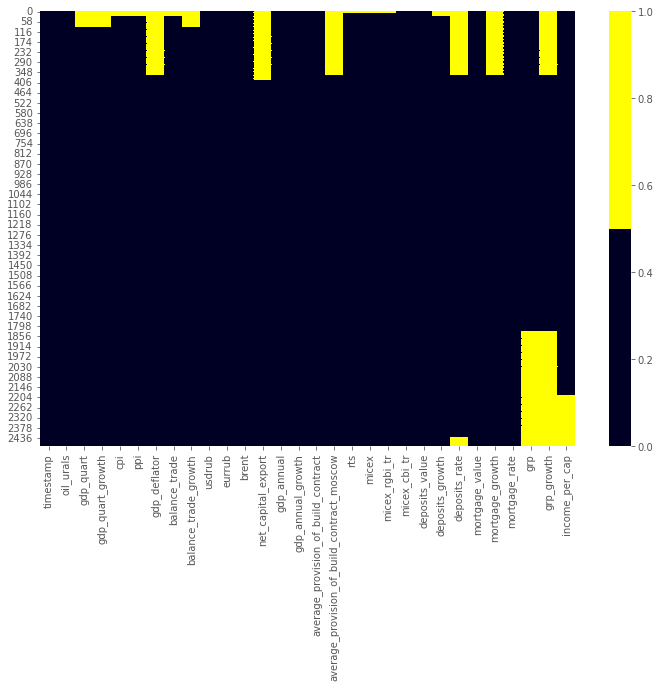

In [4]:
cols = df.columns[:30]
colours = ['#000024','#ffff00']
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colours))

In [5]:
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col,round(pct_missing*100)))
     

timestamp - 0%
oil_urals - 0%
gdp_quart - 4%
gdp_quart_growth - 4%
cpi - 1%
ppi - 1%
gdp_deflator - 15%
balance_trade - 1%
balance_trade_growth - 4%
usdrub - 0%
eurrub - 0%
brent - 0%
net_capital_export - 16%
gdp_annual - 0%
gdp_annual_growth - 0%
average_provision_of_build_contract - 0%
average_provision_of_build_contract_moscow - 15%
rts - 0%
micex - 0%
micex_rgbi_tr - 0%
micex_cbi_tr - 0%
deposits_value - 0%
deposits_growth - 1%
deposits_rate - 17%
mortgage_value - 0%
mortgage_growth - 15%
mortgage_rate - 0%
grp - 26%
grp_growth - 41%
income_per_cap - 12%
real_dispos_income_per_cap_growth - 26%
salary - 12%
salary_growth - 26%
fixed_basket - 0%
retail_trade_turnover - 12%
retail_trade_turnover_per_cap - 12%
retail_trade_turnover_growth - 12%
labor_force - 12%
unemployment - 12%
employment - 12%
invest_fixed_capital_per_cap - 12%
invest_fixed_assets - 12%
profitable_enterpr_share - 26%
unprofitable_enterpr_share - 26%
share_own_revenues - 26%
overdue_wages_per_cap - 26%
fin_res_per_c

created missing indicator for:gdp_quart
created missing indicator for:gdp_quart_growth
created missing indicator for:cpi
created missing indicator for:ppi
created missing indicator for:gdp_deflator
created missing indicator for:balance_trade
created missing indicator for:balance_trade_growth
created missing indicator for:usdrub
created missing indicator for:eurrub
created missing indicator for:brent
created missing indicator for:net_capital_export
created missing indicator for:average_provision_of_build_contract_moscow
created missing indicator for:rts
created missing indicator for:micex
created missing indicator for:micex_rgbi_tr
created missing indicator for:micex_cbi_tr
created missing indicator for:deposits_growth
created missing indicator for:deposits_rate
created missing indicator for:mortgage_growth
created missing indicator for:grp
created missing indicator for:grp_growth
created missing indicator for:income_per_cap
created missing indicator for:real_dispos_income_per_cap_growt

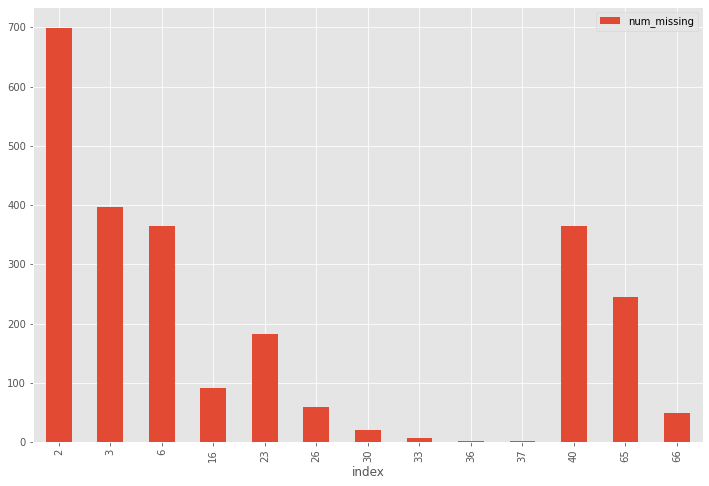

In [6]:
for col in df.columns:
  missing = df[col].isnull()
  num_missing = np.sum(missing)

  if num_missing > 0:
    print('created missing indicator for:{}'.format(col))
    df['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index',y='num_missing')

In [7]:
ind_missing = df[df['num_missing'] > 40].index
df_less_missing_rows = df.drop(ind_missing,axis=0)
df

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,turnover_catering_per_cap_ismissing,theaters_viewers_per_1000_cap_ismissing,seats_theather_rfmin_per_100000_cap_ismissing,museum_visitis_per_100_cap_ismissing,bandwidth_sports_ismissing,population_reg_sports_share_ismissing,students_reg_sports_share_ismissing,apartment_build_ismissing,apartment_fund_sqm_ismissing,num_missing
0,2010/1/1,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,True,37
1,2010/1/2,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,True,36
2,2010/1/3,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,True,36
3,2010/1/4,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9050,...,False,False,False,False,True,True,False,False,True,33
4,2010/1/5,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8360,...,False,False,False,False,True,True,False,False,True,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2016/10/15,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,True,True,True,True,True,True,True,True,True,66
2480,2016/10/16,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,True,True,True,True,True,True,True,True,True,66
2481,2016/10/17,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,63.0856,...,True,True,True,True,True,True,True,True,True,66
2482,2016/10/18,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9512,...,True,True,True,True,True,True,True,True,True,66


In [8]:

df_less_missing_rows

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,turnover_catering_per_cap_ismissing,theaters_viewers_per_1000_cap_ismissing,seats_theather_rfmin_per_100000_cap_ismissing,museum_visitis_per_100_cap_ismissing,bandwidth_sports_ismissing,population_reg_sports_share_ismissing,students_reg_sports_share_ismissing,apartment_build_ismissing,apartment_fund_sqm_ismissing,num_missing
0,2010/1/1,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,True,37
1,2010/1/2,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,True,36
2,2010/1/3,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,True,36
3,2010/1/4,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9050,...,False,False,False,False,True,True,False,False,True,33
4,2010/1/5,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8360,...,False,False,False,False,True,True,False,False,True,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2015/12/27,36.7805,21294.4,-3.7,506.4,581.6,123.661,10.108,-3.4,70.6396,...,False,True,False,True,False,True,True,True,False,40
2187,2015/12/28,36.7805,21294.4,-3.7,506.4,581.6,123.661,10.108,-3.4,72.0838,...,False,True,False,True,False,True,True,True,False,40
2188,2015/12/29,36.7805,21294.4,-3.7,506.4,581.6,123.661,10.108,-3.4,72.2141,...,False,True,False,True,False,True,True,True,False,40
2189,2015/12/30,36.7805,21294.4,-3.7,506.4,581.6,123.661,10.108,-3.4,73.4343,...,False,True,False,True,False,True,True,True,False,40


In [9]:
cols_to_drop = ['provision_retail_space_modern_sqm']
df_provision_retail_space_modern_sqm = df.drop(cols_to_drop,axis=1)
df_provision_retail_space_modern_sqm

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,turnover_catering_per_cap_ismissing,theaters_viewers_per_1000_cap_ismissing,seats_theather_rfmin_per_100000_cap_ismissing,museum_visitis_per_100_cap_ismissing,bandwidth_sports_ismissing,population_reg_sports_share_ismissing,students_reg_sports_share_ismissing,apartment_build_ismissing,apartment_fund_sqm_ismissing,num_missing
0,2010/1/1,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,True,37
1,2010/1/2,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,True,36
2,2010/1/3,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,True,36
3,2010/1/4,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9050,...,False,False,False,False,True,True,False,False,True,33
4,2010/1/5,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8360,...,False,False,False,False,True,True,False,False,True,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2016/10/15,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,True,True,True,True,True,True,True,True,True,66
2480,2016/10/16,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,True,True,True,True,True,True,True,True,True,66
2481,2016/10/17,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,63.0856,...,True,True,True,True,True,True,True,True,True,66
2482,2016/10/18,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9512,...,True,True,True,True,True,True,True,True,True,66


In [10]:

med = df['hospital_bed_occupancy_per_year'].median()
print(med)
df['hospital_bed_occupancy_per_year'] = df['hospital_bed_occupancy_per_year'].fillna(med)
     
298.0

298.0


298.0

In [11]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
  missing = df[col].isnull()
  num_missing = np.sum(missing)

  if num_missing > 0:
    print('imputing missing values for:{}'.format(col))
    df['{}_ismissing'.format(col)] = missing
    med = df[col].median()
    df[col] = df[col].fillna(med)

imputing missing values for:gdp_quart
imputing missing values for:gdp_quart_growth
imputing missing values for:cpi
imputing missing values for:ppi
imputing missing values for:gdp_deflator
imputing missing values for:balance_trade
imputing missing values for:balance_trade_growth
imputing missing values for:usdrub
imputing missing values for:eurrub
imputing missing values for:brent
imputing missing values for:net_capital_export
imputing missing values for:average_provision_of_build_contract_moscow
imputing missing values for:rts
imputing missing values for:micex
imputing missing values for:micex_rgbi_tr
imputing missing values for:micex_cbi_tr
imputing missing values for:deposits_growth
imputing missing values for:deposits_rate
imputing missing values for:mortgage_growth
imputing missing values for:grp
imputing missing values for:grp_growth
imputing missing values for:income_per_cap
imputing missing values for:real_dispos_income_per_cap_growth
imputing missing values for:salary
imputing 

In [12]:

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
  missing = df[col].isnull()
  num_missing = np.sum(missing)

  if num_missing > 0:
    print('imputing missing values for:{}'.format(col))
    df['{}_ismissing'.format(col)] = missing
    top = df[col].describe()['top']
    df[col] = df[col].fillna(top)

imputing missing values for:child_on_acc_pre_school
imputing missing values for:modern_education_share
imputing missing values for:old_education_build_share


In [13]:
df.groupby('hospital_bed_occupancy_per_year').size()

hospital_bed_occupancy_per_year
286.0     365
293.0     365
298.0    1389
302.0     365
dtype: int64

In [14]:
df['hospital_bed_occupancy_per_year'] = df['hospital_bed_occupancy_per_year'].replace([286.0],'')
df.groupby('hospital_bed_occupancy_per_year').size()

hospital_bed_occupancy_per_year
293.0     365
298.0    1389
302.0     365
          365
dtype: int64

hospital_bed_occupancy_per_year
293.0     365
298.0    1389
302.0     365
          365
dtype: int64

In [21]:

df['hospital_bed_occupancy_per_year'] = df['hospital_bed_occupancy_per_year'].replace([''],-999)
df.groupby('hospital_bed_occupancy_per_year').size()

hospital_bed_occupancy_per_year
-999.0     365
 293.0     365
 298.0    1389
 302.0     365
dtype: int64

In [22]:
df.groupby('timestamp').size()
df['timestamp'] = df['timestamp'].replace(['2010/1/1'],'9999/99/99')
df.groupby('timestamp').size()
     

timestamp
2010/1/10     1
2010/1/11     1
2010/1/12     1
2010/1/13     1
2010/1/14     1
             ..
2016/9/6      1
2016/9/7      1
2016/9/8      1
2016/9/9      1
9999/99/99    1
Length: 2484, dtype: int64

In [23]:
df.groupby('apartment_build').size()

apartment_build
22825.0     365
23587.0     365
42551.0    1024
46080.0     365
46352.0     365
dtype: int64

In [24]:
df['apartment_build']=df['hospital_bed_occupancy_per_year'].replace([-999],100000)

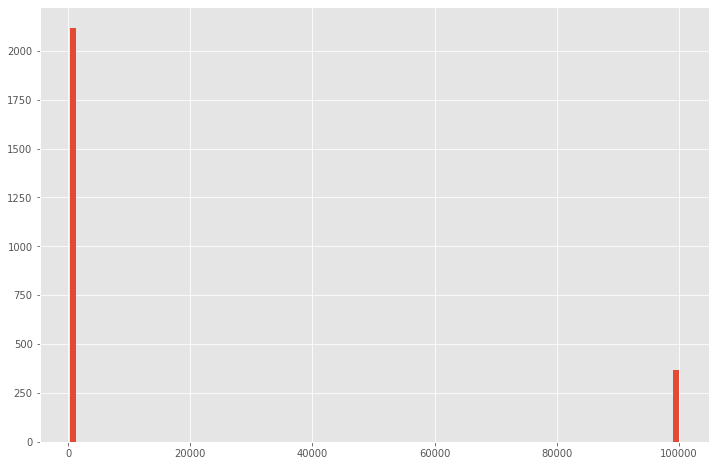

In [25]:
df['apartment_build'].hist(bins=100)

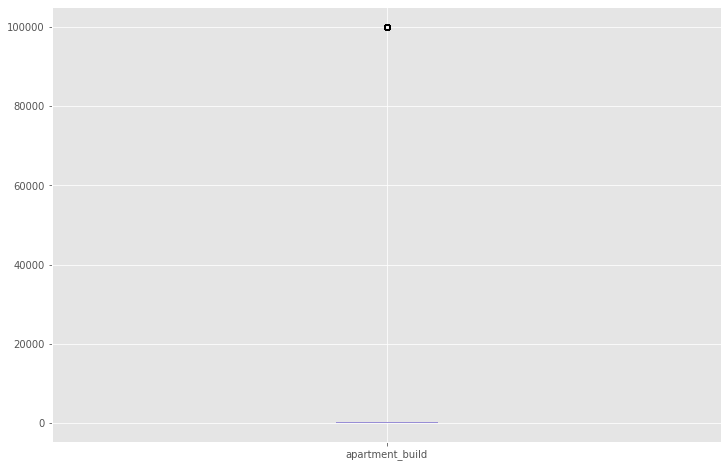

In [27]:
df.boxplot(column=['apartment_build'])

In [28]:
df['apartment_build'].describe()

count      2484.000000
mean      14948.106683
std       35306.313783
min         293.000000
25%         298.000000
50%         298.000000
75%         302.000000
max      100000.000000
Name: apartment_build, dtype: float64

In [36]:
#df['ecology'].value_counts().plot.bar()
df.groupby('grp').size()
def categorise(df_new):
  if df_new['grp'] == 8375.8638:
    return'A'
  elif df_new['grp'] == 9948.7728:
    return'B'
  elif df_new['grp'] == 10666.8705:
    return'C'
  elif df_new['grp'] == 11814.8974:
    return'D'
  elif df_new['grp'] == 12808.5734:
    return'E'

df['category_grp'] = df.apply(lambda df: categorise(df),axis=1)
df.groupby('category_grp').size

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f22e0b5b730>>

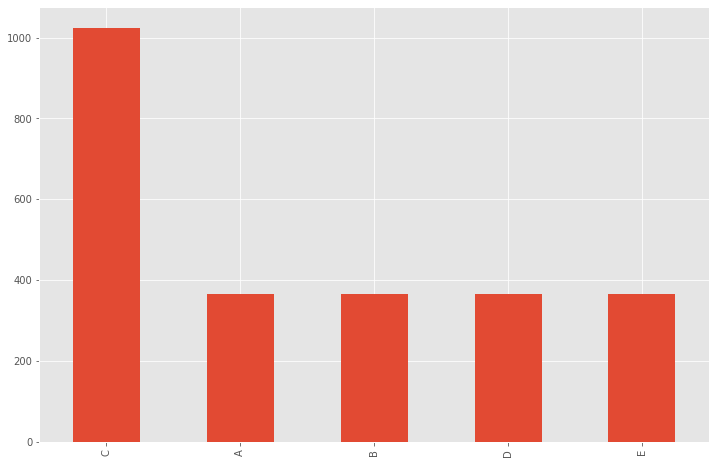

In [37]:
df['category_grp'].value_counts().plot.bar()

In [39]:
num_rows=len(df.index)
low_information_cols = [] 
for col in df.columns:
  cnts = df[col].value_counts(dropna=False)
  top_pct = (cnts/num_rows).iloc[0]
  if top_pct > 0.996:
    low_information_cols.append(col)
    print('{0}:{1:.5f}%'.format(col,top_pct*100))
    print(cnts)
    print()

usdrub_ismissing:99.87923%
False    2481
True        3
Name: usdrub_ismissing, dtype: int64

eurrub_ismissing:99.87923%
False    2481
True        3
Name: eurrub_ismissing, dtype: int64

brent_ismissing:99.87923%
False    2481
True        3
Name: brent_ismissing, dtype: int64

micex_cbi_tr_ismissing:99.95974%
False    2483
True        1
Name: micex_cbi_tr_ismissing, dtype: int64

